## ML Assignemnet 02 - Shreeya Lal

To enhance restaurants' understanding of tipping behavior, helping tailor services
and optimize operations develop a predictive model to estimate tip amounts in
restaurants based on customer billing and demographic details.

# Step 1: Data Loading and Initial Exploration
* Load the dataset.
* Check for missing values, duplicates, and data types.
* Basic descriptive statistics.

In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving tips (data for regression problem).csv to tips (data for regression problem).csv


In [3]:
# Load the uploaded CSV file
data = pd.read_csv('tips (data for regression problem).csv')

In [4]:
# Display basic info
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


In [5]:
# Check for missing values
print(data.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


# Step 2: Exploratory Data Analysis (EDA)
* **Scatter Plot:** Examines individual feature relationships with the target (tip).
* **Pair Plot:** Provides a broader view of feature relationships.
* **Correlation Matrix:** Shows correlations.
* **Rainbow Test:** Statistical check for linearity.
* **Residual Plot:** To verify if errors are randomly distributed.
* **Line Plot** (if there is a time-series component).

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

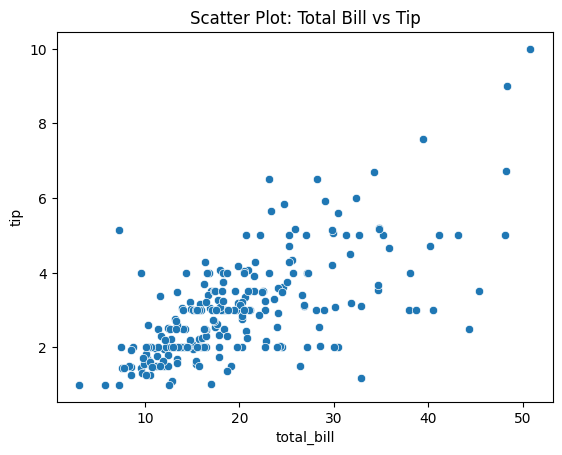

In [7]:
# Scatter Plot
sns.scatterplot(data=data, x='total_bill', y='tip')
plt.title('Scatter Plot: Total Bill vs Tip')
plt.show()

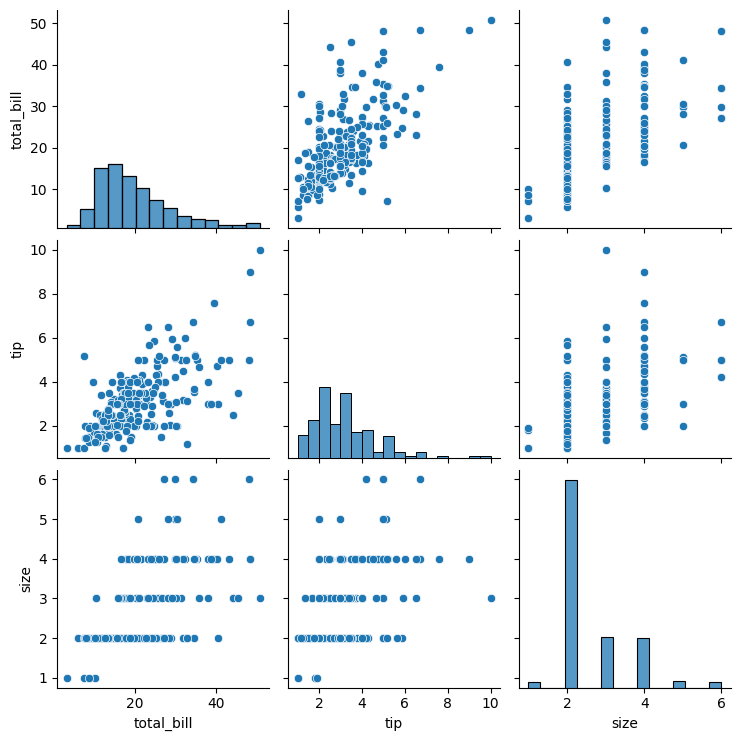

In [8]:
# Pair Plot
sns.pairplot(data)
plt.show()

In [10]:
# Convert categorical variables to numeric using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

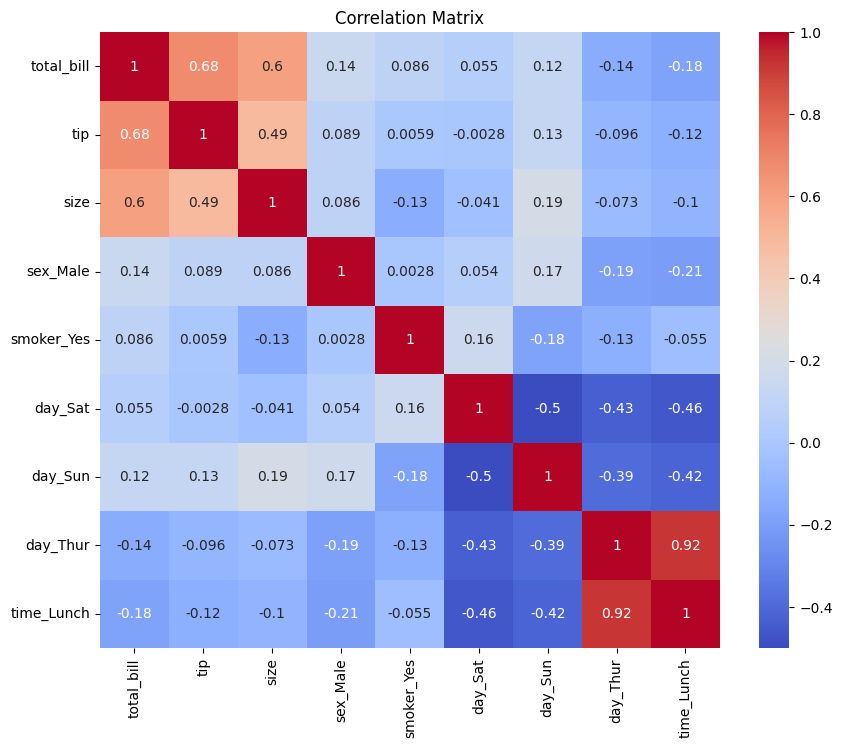

In [12]:
# Generate the correlation matrix on the encoded data
plt.figure(figsize=(10, 8))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
# Rainbow Test for Linearity
X = data[['total_bill', 'size']]  # Assuming these are predictor columns
X = sm.add_constant(X)
y = data['tip']
model = sm.OLS(y, X).fit()
rainbow_statistic, rainbow_p_value = linear_rainbow(model)
print("Rainbow test statistic:", rainbow_statistic)
print("Rainbow test p-value:", rainbow_p_value)

Rainbow test statistic: 1.1902656646832817
Rainbow test p-value: 0.17048935693447634


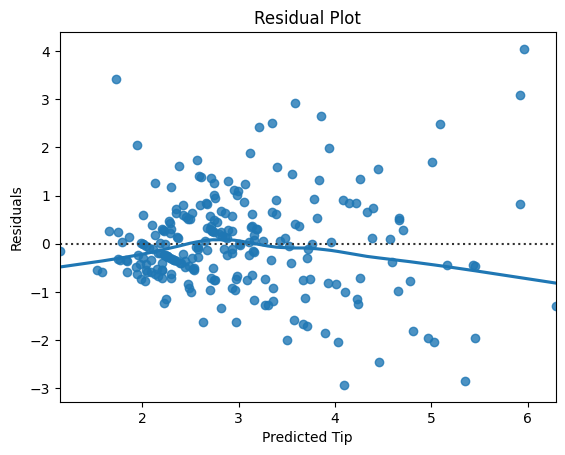

In [14]:
# Residuals Plot
sns.residplot(x=model.predict(X), y=y, lowess=True)
plt.xlabel('Predicted Tip')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Step 3: Model Building
For each model, split the data, train the model, and evaluate.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [16]:
# Split data into train and test sets
X = data[['total_bill', 'size']]  # Features
y = data['tip']  # Target variable

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Define function to evaluate models
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mae, mse, r2

In [19]:
# Linear Regression
lin_reg = LinearRegression().fit(X_train, y_train)
lin_mae, lin_mse, lin_r2 = evaluate_model(lin_reg, X_test, y_test)

In [20]:
# Ridge Regression
ridge = Ridge(alpha=1.0).fit(X_train, y_train)
ridge_mae, ridge_mse, ridge_r2 = evaluate_model(ridge, X_test, y_test)

In [21]:
# Lasso Regression
lasso = Lasso(alpha=0.1).fit(X_train, y_train)
lasso_mae, lasso_mse, lasso_r2 = evaluate_model(lasso, X_test, y_test)

In [22]:
# Decision Tree Regression
tree = DecisionTreeRegressor().fit(X_train, y_train)
tree_mae, tree_mse, tree_r2 = evaluate_model(tree, X_test, y_test)

In [23]:
# Random Forest Regression
forest = RandomForestRegressor().fit(X_train, y_train)
forest_mae, forest_mse, forest_r2 = evaluate_model(forest, X_test, y_test)

In [24]:
# Support Vector Regression
svr = SVR(kernel='linear').fit(X_train, y_train)
svr_mae, svr_mse, svr_r2 = evaluate_model(svr, X_test, y_test)

In [25]:
# K-Nearest Neighbors Regression
knn = KNeighborsRegressor().fit(X_train, y_train)
knn_mae, knn_mse, knn_r2 = evaluate_model(knn, X_test, y_test)

In [26]:
# Print model evaluation results
print(f"Linear Regression: MAE={lin_mae}, MSE={lin_mse}, R2={lin_r2}")
print(f"Ridge Regression: MAE={ridge_mae}, MSE={ridge_mse}, R2={ridge_r2}")
print(f"Lasso Regression: MAE={lasso_mae}, MSE={lasso_mse}, R2={lasso_r2}")
print(f"Decision Tree: MAE={tree_mae}, MSE={tree_mse}, R2={tree_r2}")
print(f"Random Forest: MAE={forest_mae}, MSE={forest_mse}, R2={forest_r2}")
print(f"Support Vector Regression: MAE={svr_mae}, MSE={svr_mse}, R2={svr_r2}")
print(f"K-Nearest Neighbors: MAE={knn_mae}, MSE={knn_mse}, R2={knn_r2}")

Linear Regression: MAE=0.6639235737596483, MSE=0.6485996190543516, R2=0.4811084097989491
Ridge Regression: MAE=0.6635062841685714, MSE=0.647631556791715, R2=0.4818828773627838
Lasso Regression: MAE=0.6374841046500827, MSE=0.5908528649971524, R2=0.5273068720881755
Decision Tree: MAE=0.8555102040816327, MSE=1.0848489795918368, R2=0.1321009207974514
Random Forest: MAE=0.7161231292517006, MSE=0.7860398672335611, R2=0.3711536906775972
Support Vector Regression: MAE=0.6726126897614966, MSE=0.689700910385633, R2=0.4482266229590187
K-Nearest Neighbors: MAE=0.7170612244897958, MSE=0.7394298775510204, R2=0.40844253722501


# Step 4: Insights for Management
Using results from the best-performing model to suggest actionable insights.

* **Feature Importance:**
For models like Random Forest, show which features have the most influence.

* **Tip Influences:**
For example, higher bills may generally lead to higher tips, but a customer’s group size could affect tipping behavior.

In [27]:
# Feature importance for Random Forest
feature_importances = forest.feature_importances_
for i, v in enumerate(X.columns):
    print(f"{v}: {feature_importances[i]}")

total_bill: 0.9034952125907174
size: 0.09650478740928264
